In [68]:
import os
import numpy as np
import pandas as pd
import random
from copy import deepcopy
#  import the geodesic module from the geopy library
from geopy.distance import geodesic as GD
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df = pd.read_csv('network_bus.csv', sep = ';')
df

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,"route_I_counts,,,,,,,,,,,,,,"
0,72,1659,296,40.0,98,"49:69,,,,,,,,,,,,,,"
1,73,5563,347,22.0,12,"348:12,,,,,,,,,,,,,,"
2,73,3158,364,59.0,137,"218:82,,,,,,,,,,,,,,"
3,75,8292,254,62.0,59,"124:59,,,,,,,,,,,,,,"
4,76,3930,395,53.0,67,"171:67,,,,,,,,,,,,,,"
...,...,...,...,...,...,...
9664,8342,7981,419,251.0,465,"145:157,,,,,,,,,,,,,,"
9665,8342,7502,317,79.0,286,"356:16,,,,,,,,,,,,,,"
9666,8343,7888,455,147.0,52,"239:52,,,,,,,,,,,,,,"
9667,8344,97,396,104.0,68,"277:68,,,,,,,,,,,,,,"


In [70]:
# Create your dictionary class 
class my_dictionary(dict): 
  
    # __init__ function 
    def __init__(self): 
        self = dict() 
          
    # Function to add key:value 
    def add(self, key, value): 
        self[key] = value 

In [71]:
d1 = my_dictionary()

for i in range(len(df)):
    t = (df.iloc[i, 0], df.iloc[i, 1])
    l = [df.iloc[i, 2], df.iloc[i, 4]]
    d1.add(t, l)
    
print(d1)

{(72, 1659): [296, 98], (73, 5563): [347, 12], (73, 3158): [364, 137], (75, 8292): [254, 59], (76, 3930): [395, 67], (77, 3435): [349, 54], (79, 4708): [170, 70], (80, 6351): [255, 47], (81, 7475): [130, 47], (82, 117): [451, 478], (83, 84): [221, 188], (84, 1775): [309, 188], (85, 6810): [222, 38], (86, 5145): [458, 30], (87, 4695): [425, 68], (88, 6291): [350, 70], (89, 7289): [315, 49], (92, 5954): [190, 74], (93, 7587): [227, 74], (94, 3189): [186, 110], (95, 2559): [271, 111], (96, 7255): [3645, 42], (97, 3215): [321, 67], (98, 2410): [561, 44], (99, 2410): [545, 2], (100, 2864): [443, 75], (100, 3602): [484, 143], (101, 1167): [140, 91], (102, 1162): [402, 91], (103, 104): [432, 28], (104, 3497): [1879, 14], (104, 3444): [1231, 14], (105, 3361): [403, 316], (105, 1169): [409, 38], (106, 3319): [190, 358], (107, 1780): [241, 153], (108, 107): [139, 153], (109, 6089): [322, 72], (111, 2620): [599, 61], (111, 4853): [1816, 24], (112, 157): [114, 58], (113, 7004): [283, 98], (114, 39

In [72]:
nodes_df = pd.read_csv('network_nodes.csv', sep = ';')
nodes_df

,stop_I,lat,lon,name
0,9,41.872362,12.484440,Roma Ostiense
1,10,42.006374,12.520168,Settebagni
2,16,42.002853,12.380691,La Storta
3,17,41.818408,12.344730,Ponte Galeria
4,18,41.809481,12.557676,Torricola
...,...,...,...,...
7864,8615,41.886115,12.562108,GARDENIE
7865,8616,41.889483,12.551361,TEANO
7866,8617,41.887325,12.540216,MALATESTA
7867,8618,41.888342,12.528663,PIGNETO


In [73]:
d2 = my_dictionary()

for i in range(len(nodes_df)):
    d2.add(nodes_df.iloc[i, 0], [nodes_df.iloc[i, 1], nodes_df.iloc[i, 2], nodes_df.iloc[i, 3]])
    
print(d2)

{9: [41.872362, 12.48444, 'Roma Ostiense'], 10: [42.006374, 12.520168, 'Settebagni'], 16: [42.002853, 12.380691, 'La Storta'], 17: [41.818408, 12.34473, 'Ponte Galeria'], 18: [41.809481, 12.557676, 'Torricola'], 19: [41.824775, 12.408648, 'Muratella'], 20: [41.847902, 12.455112, 'Villa Bonelli'], 21: [41.81002, 12.319127, 'Fiera di Roma'], 22: [42.01463, 12.363741, 'Olgiata'], 23: [41.872385, 12.466139, 'Roma Trastevere'], 24: [41.896065, 12.454467, 'Roma San Pietro'], 25: [41.911906, 12.438886, 'Appiano Proba Petronia'], 26: [41.927852, 12.427862, 'Gemelli'], 27: [41.799809, 12.296186, 'Parco Leonardo'], 28: [41.946703, 12.416304, 'Roma San Filippo Neri'], 30: [41.830764, 12.568833, 'Capannelle'], 31: [41.834296, 12.430979, 'Magliana'], 32: [41.979177, 12.508455, 'Fidene'], 33: [41.878598, 12.458787, 'Quattro Venti'], 34: [41.968752, 12.408857, 'Ipogeo degli Ottavi'], 35: [41.911082, 12.531088, 'Roma Tiburtina'], 37: [41.879237, 12.523672, 'Roma Tuscolana'], 38: [41.939064, 12.421741,

## Nodes Distribution

In [74]:
import plotly.express as px

fig = px.scatter(data_frame = nodes_df, x = 'lon', y = 'lat', hover_data = ['name'], width = 1000, height = 800, size_max = 10, opacity = 0.5
                )
fig.update_traces(marker = dict(size = 10, color = 'lightskyblue', line = dict(width = 1, color = 'purple')))

fig.show()

### Generating User Data

In [75]:
def normal(A):

    N = np.shape(A)[0]
    M = np.zeros((N, np.shape(A)[1]))

    for i in range(N):
        M[i, :] = A[i, :] / np.sum(A[i, :])

    return M

In [76]:
def genLoc(p, Z, M, I):
    L = []
    for i in range(p):

        if i == 0:
            # Select first location based on importance of location
            start = np.random.choice([i for i in range(Z)], p = I, size = 1)
            last_index = start[0]
            L.append(nodes_df.iloc[start[0], 0])

        else:
            # Select next location based on normalized transition matrix
            last_location = L[-1]
            next = np.random.choice([i for i in range(Z)], p = list(M[last_index, :]), size=1)
            last_index = next[0]
            next_node = nodes_df.iloc[next[0], 0]
            
            x = (d2[last_location][0], d2[last_location][1])
            y = (d2[next_node][0], d2[next_node][1])
            d = GD(x,y).miles
            
            if(d > 25) :
                i = i - 1
            
            else :
                L.append(next_node)
            
    return L

In [77]:
# Number of locations/zones
Z = len(nodes_df)

# Transition matrix
# A[i, j] = Number of trips from location i to location j (based on the number of trips in the dataset)
A = np.random.randint(5, size=(Z, Z))
print (A)

# Normalize matrix so that each row adds to 1.0
# The new transition matrix M[i, j] represents the probability of moving from location i to j
M = normal(A)
print (M)

# Importance of each location is the total number of trips starting at that zone
I = [np.sum(A[i, :]) + np.sum(A[:, i]) - A[i, i]  for i in range(Z)]
I = [float(I[i]) / float(sum(I)) for i in range(Z)]

[[2 3 1 ... 3 0 2]
 [3 2 4 ... 4 2 1]
 [0 0 2 ... 1 1 1]
 ...
 [1 4 2 ... 0 0 2]
 [1 3 4 ... 4 1 3]
 [0 2 4 ... 4 2 2]]
[[1.26446229e-04 1.89669343e-04 6.32231144e-05 ... 1.89669343e-04
  0.00000000e+00 1.26446229e-04]
 [1.91180219e-04 1.27453479e-04 2.54906959e-04 ... 2.54906959e-04
  1.27453479e-04 6.37267397e-05]
 [0.00000000e+00 0.00000000e+00 1.28090175e-04 ... 6.40450877e-05
  6.40450877e-05 6.40450877e-05]
 ...
 [6.31273278e-05 2.52509311e-04 1.26254656e-04 ... 0.00000000e+00
  0.00000000e+00 1.26254656e-04]
 [6.32311097e-05 1.89693329e-04 2.52924439e-04 ... 2.52924439e-04
  6.32311097e-05 1.89693329e-04]
 [0.00000000e+00 1.27502231e-04 2.55004463e-04 ... 2.55004463e-04
  1.27502231e-04 1.27502231e-04]]


In [78]:
s = np.zeros(shape = (len(A), 2))
for i in range(len(A)):
    s[i] = [i, np.sum(A[i])]

sorted_s = sorted(s, key=lambda x:x[1], reverse = True)
sorted_s = sorted_s[:20]
sorted_s

[array([ 5592., 16193.]),
 array([ 3086., 16159.]),
 array([ 3756., 16158.]),
 array([ 6492., 16135.]),
 array([ 6254., 16133.]),
 array([ 1251., 16129.]),
 array([  729., 16111.]),
 array([ 3090., 16109.]),
 array([ 5814., 16105.]),
 array([ 6532., 16105.]),
 array([ 3095., 16104.]),
 array([ 3151., 16102.]),
 array([ 6548., 16095.]),
 array([ 3553., 16093.]),
 array([  213., 16092.]),
 array([ 6345., 16092.]),
 array([ 3619., 16090.]),
 array([ 3996., 16090.]),
 array([  577., 16089.]),
 array([ 2328., 16088.])]

In [79]:
K = [int(sorted_s[i][0]) for i in range(20)]
T_mat = np.zeros(shape = (20, 20))
for i in range(20):
    for j in range(20):
        T_mat[i][j] = int(A[K[i]][K[j]])
        
T_mat

array([[3., 1., 4., 4., 0., 4., 4., 0., 0., 2., 3., 0., 0., 1., 2., 0.,
        0., 3., 3., 0.],
       [4., 0., 2., 4., 0., 4., 4., 3., 0., 0., 3., 3., 4., 1., 0., 3.,
        4., 0., 4., 2.],
       [3., 3., 0., 4., 4., 3., 3., 4., 0., 0., 0., 1., 0., 4., 2., 2.,
        4., 1., 1., 3.],
       [4., 1., 1., 4., 3., 2., 2., 0., 1., 2., 4., 2., 0., 4., 3., 4.,
        3., 0., 0., 3.],
       [1., 4., 4., 4., 1., 4., 2., 0., 1., 3., 4., 2., 0., 4., 4., 1.,
        2., 0., 2., 4.],
       [1., 0., 0., 4., 0., 1., 1., 2., 0., 4., 4., 3., 1., 0., 4., 3.,
        0., 2., 2., 2.],
       [3., 0., 1., 4., 4., 1., 3., 3., 3., 3., 2., 3., 3., 2., 0., 4.,
        0., 0., 4., 0.],
       [2., 2., 3., 3., 0., 4., 0., 1., 4., 4., 4., 0., 3., 4., 3., 3.,
        4., 4., 0., 2.],
       [4., 0., 1., 4., 2., 2., 4., 3., 3., 1., 0., 3., 2., 0., 4., 3.,
        0., 3., 2., 3.],
       [3., 4., 0., 3., 1., 2., 4., 3., 3., 1., 1., 0., 3., 1., 3., 4.,
        0., 1., 1., 4.],
       [4., 2., 3., 4., 3., 1.

In [80]:
key = [nodes_df.loc[K[i], 'stop_I'] for i in range(20)]
key

[6155,
 3242,
 3928,
 7118,
 6872,
 1394,
 868,
 3246,
 6408,
 7160,
 3251,
 3307,
 7184,
 3722,
 346,
 6967,
 3790,
 4184,
 716,
 2480]

In [81]:
names_list = [d2[key[i]][2] for i in range(20)]
names_list

['MONROE/GARBO',
 'NOMENTANA/SCUOLA RURALE',
 'TRULLO/BRUGNATO',
 'POLLIO/DE CRISTOFORIS',
 'GADDA/GUIDO DA VERONA',
 'SALARIA/PRATI FISCALI',
 'STAZ. TRASTEVERE (FS)',
 'NOMENTANA/CATACOMBE',
 'ALLUMIERE',
 'TRIGORIA/MONOTYPE',
 'NOMENTANA/POGGIO FIORITO',
 'TRIONFALE/MACCHIA INSUGHERATA',
 'ROMAGNONI',
 'MAZZINI/CALBOLI',
 'C.SO VITTORIO EMANUELE/TASSONI',
 'MOSCA',
 'JACHINO/BARILATTI 1',
 'ERODE ATTICO/APPIA PIGNATELLI',
 'PORTA METRONIA',
 'DI DONATO']

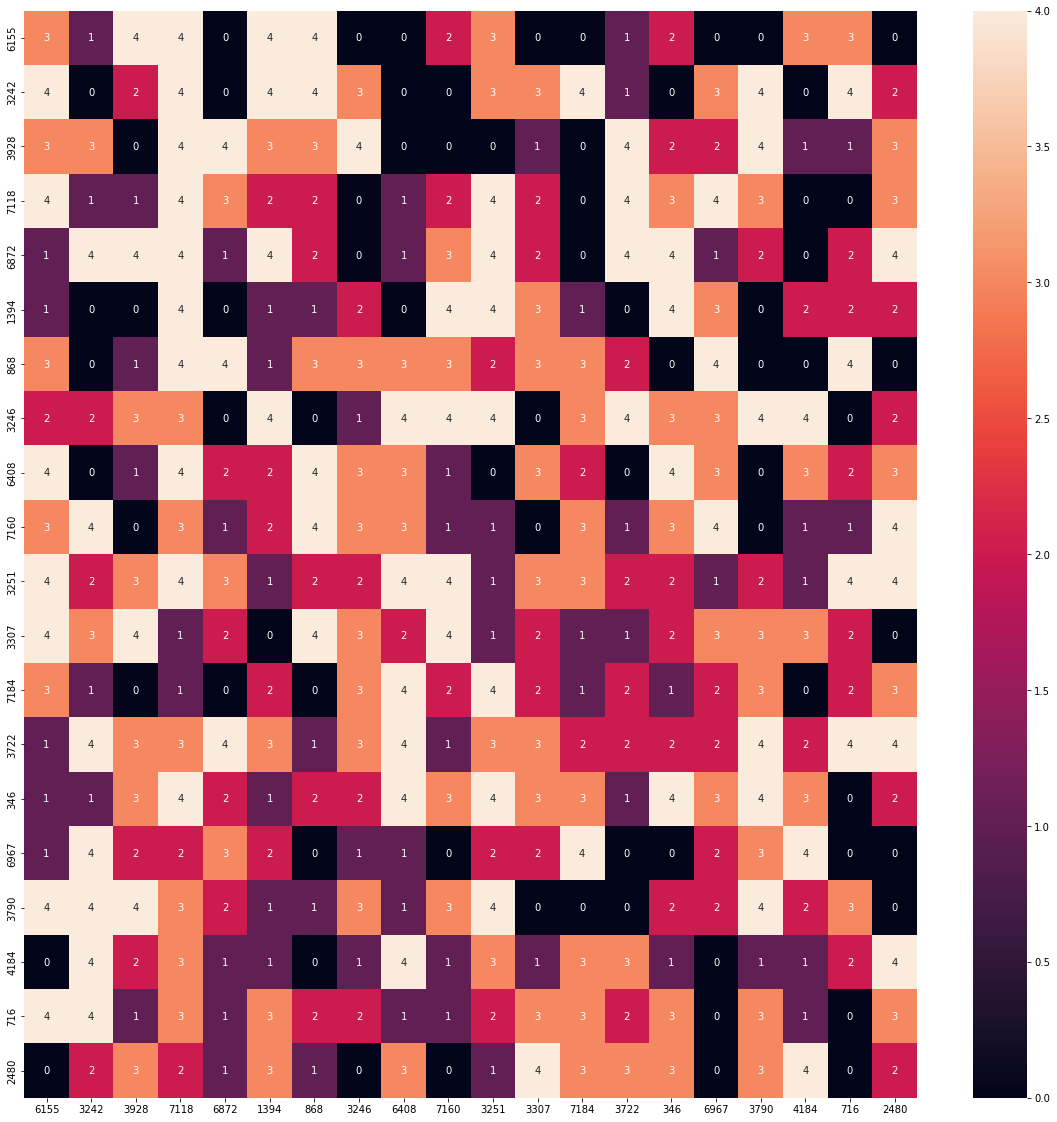

In [82]:
fig, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(T_mat, annot = True, xticklabels = key, yticklabels = key)

In [83]:
p = 3

user_data = []

for i in range(3):
    L = genLoc(p, Z, M, I)
    user_data.append(L)
    p = p + 1
    
print(user_data)

[[548, 1542, 3475], [8086, 540, 7312, 7502], [8129, 580, 480, 6063, 4667]]


In [84]:
X = []
Y = []
H = []

for i in range(3):
    x = []
    y = []
    h = []
    for j in range(len(user_data[i])):
        key = user_data[i][j]
        x.append(d2[key][1])
        y.append(d2[key][0])
        h.append(d2[key][2])
        
    x.append(x[0])
    y.append(y[0])
    h.append(h[0])
    X.append(x)
    Y.append(y)
    H.append(h)
    
print(X)
print(Y)
print(H)

[[12.484179, 12.36903, 12.360057, 12.484179], [12.425395, 12.447505, 12.69776, 12.521713, 12.425395], [12.531676, 12.456302, 12.509209, 12.487902, 12.551424, 12.531676]]
[[41.894988, 41.915867, 41.828701, 41.894988], [41.905363, 41.816722, 41.880789, 41.90928, 41.905363], [41.952179, 41.823779, 41.89175, 41.88343, 41.840931, 41.952179]]
[['FORI IMPERIALI/CAMPIDOGLIO', 'CASALOTTI/ORMEA', 'PORTUENSE/SENORBI', 'FORI IMPERIALI/CAMPIDOGLIO'], ['TARDINI/ALBERGOTTI', 'GRANDE MURAGLIA/DECIMA', 'BOTTIDDA/URZULEI', 'LEGA LOMBARDA/PROVINCIE', 'TARDINI/ALBERGOTTI'], ['MONTE RESEGONE/MONTE MASSICO', 'GRANDE MURAGLIA/OCEANO PACIFICO', 'VIA S. CROCE IN GERUSALEMME/MANZONI', 'AVENTINO/CIRCO MASSIMO (MB)', 'APPIA/GALLORO', 'MONTE RESEGONE/MONTE MASSICO']]


In [85]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x = X[0], y = Y[0], mode = 'lines + markers', name = 'User 0', text = H[0]))
fig.add_trace(go.Scatter(x = X[1], y = Y[1], mode = 'lines + markers', name = 'User 1', text = H[1]))
fig.add_trace(go.Scatter(x = X[2], y = Y[2], mode = 'lines + markers', name = 'User 2', text = H[2]))

fig.update_layout(
    title="User with Different Periodicity",
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    legend_title="Users",
)

fig.show()

In [86]:
# Maximum periodicity + 1
P = 10

user_data = []
prd_list = []

random.seed(599)

for i in range(20):
    # Generate the periodicity of each user
    p = np.random.randint(2, P)
    prd_list.append(p)
    L = genLoc(p, Z, M, I)
    user_data.append(L)
    
print(user_data)

[[2445, 1233, 1582, 5588, 6420, 1427, 1801, 952, 5340], [593, 2739, 7572, 107, 925, 4309, 4748, 8420, 866], [8081, 4103, 3946], [3030, 7324, 4493, 1530], [5118, 5031, 6939, 7026, 7300, 1737, 2094, 8232], [4298, 3129, 3742, 1104, 569, 4819, 5958], [7261, 6143], [6829, 1964, 1493, 6156, 3036, 8415, 6268, 8135], [3107, 6454, 1369, 5496, 8245, 6974, 3100, 6895], [430, 2639, 1794, 2802, 7667], [2106, 5587], [4340, 3419, 1069], [4435, 2938, 4116, 1370, 5492, 5322, 4275, 772], [6566, 4853, 4611, 1030], [5334, 2536, 644, 5723, 148, 6511, 6753], [6137, 1321, 306, 1762, 831], [2817, 7252, 2506, 2058, 6368, 4958, 1416, 3488, 4855], [2777, 1619], [6056, 2671], [8058, 8287]]


In [87]:
for i in range(20):
    print(i, user_data[i], prd_list[i])

0 [2445, 1233, 1582, 5588, 6420, 1427, 1801, 952, 5340] 9
1 [593, 2739, 7572, 107, 925, 4309, 4748, 8420, 866] 9
2 [8081, 4103, 3946] 3
3 [3030, 7324, 4493, 1530] 4
4 [5118, 5031, 6939, 7026, 7300, 1737, 2094, 8232] 8
5 [4298, 3129, 3742, 1104, 569, 4819, 5958] 7
6 [7261, 6143] 2
7 [6829, 1964, 1493, 6156, 3036, 8415, 6268, 8135] 8
8 [3107, 6454, 1369, 5496, 8245, 6974, 3100, 6895] 8
9 [430, 2639, 1794, 2802, 7667] 5
10 [2106, 5587] 2
11 [4340, 3419, 1069] 3
12 [4435, 2938, 4116, 1370, 5492, 5322, 4275, 772] 8
13 [6566, 4853, 4611, 1030] 4
14 [5334, 2536, 644, 5723, 148, 6511, 6753] 7
15 [6137, 1321, 306, 1762, 831] 5
16 [2817, 7252, 2506, 2058, 6368, 4958, 1416, 3488, 4855] 9
17 [2777, 1619] 2
18 [6056, 2671] 2
19 [8058, 8287] 2


In [88]:
user_data_copy = user_data

In [89]:
new_df = pd.DataFrame(index = range(150), columns = range(20))

In [90]:
n_r = len(new_df.index)

for i in range(20):
    f = n_r // len(user_data[i])
    r = n_r % len(user_data[i])
    
    s = f * user_data[i]
    
    for j in range(r):
        s.append(user_data[i][j])
        
    new_df.iloc[:, i] = s
    
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2445,593,8081,3030,5118,4298,7261,6829,3107,430,2106,4340,4435,6566,5334,6137,2817,2777,6056,8058
1,1233,2739,4103,7324,5031,3129,6143,1964,6454,2639,5587,3419,2938,4853,2536,1321,7252,1619,2671,8287
2,1582,7572,3946,4493,6939,3742,7261,1493,1369,1794,2106,1069,4116,4611,644,306,2506,2777,6056,8058
3,5588,107,8081,1530,7026,1104,6143,6156,5496,2802,5587,4340,1370,1030,5723,1762,2058,1619,2671,8287
4,6420,925,4103,3030,7300,569,7261,3036,8245,7667,2106,3419,5492,6566,148,831,6368,2777,6056,8058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1233,2739,4103,7324,5031,4819,6143,1964,6454,430,5587,3419,2938,4853,6511,6137,7252,1619,2671,8287
146,1582,7572,3946,4493,6939,5958,7261,1493,1369,2639,2106,1069,4116,4611,6753,1321,2506,2777,6056,8058
147,5588,107,8081,1530,7026,4298,6143,6156,5496,1794,5587,4340,1370,1030,5334,306,2058,1619,2671,8287
148,6420,925,4103,3030,7300,3129,7261,3036,8245,2802,2106,3419,5492,6566,2536,1762,6368,2777,6056,8058


noised_df = pd.DataFrame(np.zeros(shape = (100, n_c)), columns = ['8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00'])
noised_df.head()

###### probability variable
p = 0.02

for i in range(20):
    len_list = len(user_data[i])
    c = 0
    for j in range(n_c):
        if j == n_c - 1:
            noised_df.iloc[i][j] = user_data[i][c]
            c = (c + 1) % len_list
        
        x = random.random()
        
        if x <= p:
            temp = np.random.choice([item for item in nodes_df['stop_I'] if item not in user_data[i]], size = 1)
            noised_df.iloc[i][j] = temp[0]
        else:
            noised_df.iloc[i][j] = user_data[i][c]
            c = (c + 1) % len_list
noised_df

In [91]:
def create(Data, t, F, W):
    X = []
    y = []
    for w in range(t - W, t - F):
        x = [Data[w + f] for f in range(F - 1)]
        X.append(x)
        y.append(Data[w + F - 1])
    return np.array(X), np.array(y)

In [92]:
from sklearn import svm

# threshold value
th = 0.8

random.seed(599)

# Reset Probability
rP = [random.uniform(0, 0.2) for i in range(20)]

# Total Time
T = 150

# Feature size
F = 5

# Window for learning ML parameters
W_train, W_test = 40, 40
acc = np.full([20], None)

clf = np.full([20], None)

iter_list = np.zeros(20)

reset_cnt = np.zeros(20)

r_df = pd.DataFrame(index = range(T), columns = range(20))

for t in range(T):
    for i in range(20):
        # Generate new periodic trip if random number is less than reset probability
        if random.uniform(0, 1) < rP[i]:
            print('** Reset')
            reset_cnt[i] = reset_cnt[i] + 1
            tp = genLoc(prd_list[i], Z, M, I)
            user_data_copy[i] = deepcopy(tp)
            r_df.iloc[t][i] = user_data_copy[i][0]
            iter_list[i] = 1
            
        else:
            # Add next trip location to the current trip list
            j = int(iter_list[i] % prd_list[i])
            r_df.iloc[t][i] = user_data_copy[i][j]
            iter_list[i] = iter_list[i] + 1
            
        if (acc[i] is None or acc[i] < th) and t > W_train:
            # Learn the ML parameter
            print ('** Relearn')
            X, y = create(r_df.iloc[:, i], t , F, W_train)
            clf[i] = svm.SVC()
            clf[i].fit(X, y)

        if t > W_test and clf[i] is not None:
            acc[i] = 0.0
            X, y = create(r_df.iloc[:, i], t, F, W_test)
            
            for j in range(np.shape(X)[0]):
                y_pred = clf[i].predict([X[j, :]])

                if y_pred == y[j]:
                    acc[i] += 1
        
            acc[i] = acc[i] / np.shape(X)[0]
            acc[i] = round(acc[i], 3)
                                    
    if t > W_test:
        print ('Accuracy: ', acc) 

** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Reset
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Reset
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
** Relearn
Accuracy:  [0.486 0.743 0.571 0.6

In [93]:
rP_ = [round(x, 2) for x in rP]
df_ = pd.DataFrame(dict(rP = rP_, acc = acc))
df_ = df_.sort_values(by = "rP")

fig = px.line(df_, x = "rP", y = "acc", markers = True)

fig.update_layout(
    xaxis_title="rP",
    yaxis_title="Accuracy",
    margin=dict(l=50, r=50, b=50, t=80),
    font_size = 20
)

fig.show()

In [94]:
df_ = pd.DataFrame(dict(rP = rP_, Resets = reset_cnt))
df_ = df_.sort_values(by = "rP")

fig = px.bar(df_, x = "rP", y = "Resets")

fig.update_layout(
    xaxis_title="rP",
    yaxis_title="Resets",
    margin=dict(l=40, r=50, b=50, t=80),
    font_size = 20
)

fig.show()

In [95]:
X = []
Y = []
H = []
K = []

for i in range(60, 80):
    key = r_df[7][i]
    X.append(d2[key][1])
    Y.append(d2[key][0])
    H.append(d2[key][2])
    K.append(key)
    
print(X)
print(Y)
print(H)
print(K)

[12.511712, 12.492751, 12.384725, 12.553025, 12.431106, 12.455082, 12.445756, 12.41215, 12.440745, 12.466717, 12.497765, 12.479314, 12.332756, 12.380932, 12.533756, 12.466432, 12.520137, 12.480386, 12.516859, 12.443742]
[41.93173, 41.934111, 41.946095, 41.981804, 41.876834, 41.917213, 41.876542, 41.943185, 41.807239, 41.805569, 41.85148, 41.762996, 41.880234, 41.953934, 41.9669, 41.911456, 41.952553, 41.887502, 41.951868, 41.91247]
['PRISCILLA', 'CAMPI SPORTIVI', 'LINAROLO', 'CANETTI/BUFALOTTA', 'BIAGIO PACE', 'CLODIO', 'ZAMBARELLI/GIANICOLENSE', 'BARELLAI/SCUOLA', 'BEATA VERGINE DEL CARMELO/VIGORELLI', 'CAMUS/ACQUA ACETOSA OSTIENSE', 'CARAVAGGIO/TOR MARANCIA', 'TALAMINI/TRIGORIA', 'MALAGROTTA/CASALE BRUCIATO', 'REZZATO/TREVIGLIO', 'BASEGGIO', 'GIULIO CESARE/LEPANTO (MA)', 'GUALTERIO/SOLERI', 'LGT AVENTINO', 'GUALTERIO', "MEDAGLIE D'ORO/MARZIALE"]
[3036, 8415, 6268, 8135, 6829, 1964, 1493, 6156, 3793, 3455, 7231, 3766, 4881, 7007, 7661, 7880, 7397, 1763, 7001, 4839]


In [96]:
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[7:13],
        y=Y[7:13],
        marker=dict(color='Orange'),
        showlegend=False
    )
)

# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[:7],
        y=Y[:7],
        marker=dict(color='Crimson'),
        showlegend=False
    )
)

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[12:],
        y=Y[12:],
        marker=dict(color='DarkRed'),
        showlegend=False
    )
)

fig.update_layout(
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    margin=dict(l=50, r=50, b=100, t=100),
    font_size = 20
)

fig.show()

In [97]:
df_ = pd.DataFrame(dict(Zone = r_df.iloc[:, 11], Time = [i for i in range(150)]))

fig = px.line(df_, x = "Time", y = "Zone", title="Periodicity Graph over Time", markers = True) 
fig.show()

In [98]:
X = []
Y = []
H = []
K = []

for i in range(115, 130):
    key = r_df[11][i]
    X.append(d2[key][1])
    Y.append(d2[key][0])
    H.append(d2[key][2])
    K.append(key)
    
print(X)
print(Y)
print(H)
print(K)

[12.489576, 12.455751, 12.554457, 12.489576, 12.455751, 12.554457, 12.489576, 12.345304, 12.456242, 12.601546, 12.345304, 12.456242, 12.601546, 12.345304, 12.456242]
[41.859406, 41.864664, 41.880194, 41.859406, 41.864664, 41.880194, 41.859406, 41.777849, 41.847225, 41.9678, 41.777849, 41.847225, 41.9678, 41.777849, 41.847225]
['MACINGHI STROZZI', 'FOLCHI/PORTUENSE', 'BALZANI/DURANTE', 'MACINGHI STROZZI', 'FOLCHI/PORTUENSE', 'BALZANI/DURANTE', 'MACINGHI STROZZI', 'ROMAGNOLI/MAZZUCCONI', 'MAGLIANA NUOVA/MIGLIOLI (FL1)', 'NOMENTANA/DE LA RIVA', 'ROMAGNOLI/MAZZUCCONI', 'MAGLIANA NUOVA/MIGLIOLI (FL1)', 'NOMENTANA/DE LA RIVA', 'ROMAGNOLI/MAZZUCCONI', 'MAGLIANA NUOVA/MIGLIOLI (FL1)']
[765, 2552, 3418, 765, 2552, 3418, 765, 5573, 4673, 3227, 5573, 4673, 3227, 5573, 4673]


In [99]:
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[6:8],
        y=Y[6:8],
        marker=dict(color='gold'),
        showlegend=False
    )
)

# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[:6],
        y=Y[:6],
        marker=dict(color='Crimson'),
        showlegend=False
    )
)

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines + markers',
        x=X[7:],
        y=Y[7:],
        marker=dict(color='DarkOrange'),
        showlegend=False
    )
)

fig.update_layout(
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    margin=dict(l=50, r=50, b=100, t=100),
    font_size = 20
)

fig.show()

In [100]:
def accGen(tp, p, rP):
    # Threshold
    th = 0.8

    # Total time
    T = 150

    # Feature size
    F = 5

    cnt = 0
    Data = []

    # Window for learning ML parameters
    W_train, W_test = 40, 40
    acc = None

    clf = None

    for t in range(T):

        # Generate new periodic trip (tp) if random number is less than reset probability
        if random.uniform(0, 1) < rP:
            # print ('** Reset')
            tp = genLoc(p, Z, M, I)
            Data.append(tp[0])
            cnt = 1

        else:
            # Add next trip to the current trip list
            Data.append(tp[cnt % p])
            cnt = cnt + 1

        if (acc is None or acc < th) and t > W_train:
            # Learn the ML parameter
            # print ('** Relearn')
            X, y = create(Data, t , F, W_train)
            clf = svm.SVC(random_state = 5)
            clf.fit(X, y)

        if t > W_test and clf is not None:
            acc = 0.0
            X, y = create(Data, t, F, W_test)
            for i in range(np.shape(X)[0]):
                y_pred = clf.predict([X[i, :]])

                if y_pred == y[i]:
                    acc += 1
            acc = acc / np.shape(X)[0]
        # print ('Accuracy: ', acc)
    return acc, cnt

In [101]:
acc_list = np.zeros(20)
reset_cnt = np.zeros(20)

for i in range(20):
    acc_list[i], reset_cnt[i] =accGen(user_data[1], prd_list[1], rP[i])

In [102]:
df_ = pd.DataFrame(dict(rP = rP, acc = acc_list))
df_ = df_.sort_values(by = "rP")

fig = px.line(df_, x = "rP", y = "acc", markers = True)

fig.update_layout(
    xaxis_title="rP",
    yaxis_title="Accuracy",
    margin=dict(l=50, r=50, b=50, t=80),
    font_size = 20
)

fig.show()

In [103]:
rP_ = [round(x, 2) for x in rP]
df_ = pd.DataFrame(dict(rP = rP_, Resets = reset_cnt))
df_ = df_.sort_values(by = "rP")

fig = px.bar(df_, x = "rP", y = "Resets")

fig.update_layout(
    xaxis_title="rP",
    yaxis_title="Resets",
    margin=dict(l=40, r=50, b=50, t=80),
    font_size = 20
)

fig.show()

In [104]:
print(acc_list)
print(reset_cnt)

[0.77142857 0.68571429 0.57142857 0.8        0.4        1.
 0.97142857 0.88571429 0.91428571 0.37142857 0.74285714 0.82857143
 0.8        0.51428571 1.         0.51428571 1.         0.94285714
 0.77142857 0.88571429]
[  7.  16.   1.   1.   9. 107.   3.  11.  55.   4.  11.   4.   4.   3.
 150.   1.  81.   6.  12.  13.]


In [105]:
for i in range(20):
    print(rP[i], reset_cnt[i])

0.1414456189173677 7.0
0.06844396013593838 16.0
0.11627370481653009 1.0
0.17645806828036625 1.0
0.12688846484502644 9.0
0.026127332229078815 107.0
0.05213486240576504 3.0
0.020185697153150797 11.0
0.036508526078811145 55.0
0.18353536831957484 4.0
0.060622117044393665 11.0
0.11267814237038243 4.0
0.19282950108748806 4.0
0.19888394485150385 3.0
0.0025112974370451236 150.0
0.08108107411884675 1.0
0.036247082077955926 81.0
0.17367393671113632 6.0
0.06636804571919373 12.0
0.05316687011486568 13.0


In [106]:
def split_sequences(sequences, n_steps):
        X, y = list(), list()
        for i in range(len(sequences)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the dataset
                if end_ix > len(sequences)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)

In [107]:
acc = np.zeros(20)

clf = np.full([20], None)

for i in range(20):
    X, y = split_sequences(new_df.iloc[:, i], 5)
    clf[i] = svm.SVC()
    clf[i].fit(X, y)
    
    for j in range(np.shape(X)[0]):
        y_pred = clf[i].predict([X[j, :]])
        
        if y_pred == y[j]:
            acc[i] += 1
    acc[i] = acc[i] / np.shape(X)[0]
    acc[i] = round(acc[i], 3)

print('Accuracy: ', acc)

Accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [108]:
df_ = pd.DataFrame(dict(user = [i for i in range(20)], acc = acc))

fig = px.line(df_, x = "user", y = "acc", title="User Accuracy without Reset", markers = True) 
fig.show()

In [109]:
key = [1617, 1899, 4591, 4011, 6385, 4140, 4539, 6645, 7472, 4933, 94, 4406, 6380, 835, 4632, 4466, 2340, 4179, 2019, 2697]

resets = np.full(shape = [3, 150], fill_value = 0)
# resets_list = list()

# Reset Probability
rP = [0, 0.05, 0.10]
rP.sort()
T = 150

for i in range(len(rP)):
    cnt = 0
    for t in range(T):
        if random.uniform(0, 1) < rP[i]:
            cnt += 1
        resets[i][t] += cnt
#     resets_list.append(resets)
                
resets

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  7,

In [110]:
# resets_mean = np.mean(resets_list, axis = 0)
# resets_std = np.std(resets_list, axis = 0)
# print(np.shape(resets_mean))
# print(np.shape(resets_std))

In [111]:
def acc_Gen(tp, p, rP):
    # Threshold
    th = 0.8

    # Total time
    T = 150

    # Feature size
    F = 5

    cnt = 0
    Data = []

    # Window for learning ML parameters
    W_train, W_test = 40, 40
    acc_list = []
    acc = None

    clf = None

    for t in range(T):

        # Generate new periodic trip (tp) if random number is less than reset probability
        if random.uniform(0, 1) < rP:
            # print ('** Reset')
            tp = genLoc(p, Z, M, I)
            Data.append(tp[0])
            cnt = 1

        else:
            # Add next trip to the current trip list
            Data.append(tp[cnt % p])
            cnt = cnt + 1

        if (acc is None or acc < th) and t > W_train:
            # Learn the ML parameter
            # print ('** Relearn')
            X, y = create(Data, t , F, W_train)
            clf = svm.SVC(random_state = 5)
            clf.fit(X, y)

        if t > W_test and clf is not None:
            acc = 0.0
            X, y = create(Data, t, F, W_test)
            for i in range(np.shape(X)[0]):
                y_pred = clf.predict([X[i, :]])

                if y_pred == y[i]:
                    acc += 1
            acc = acc / np.shape(X)[0]
            acc_list.append(acc)
        # print ('Accuracy: ', acc)
    return acc_list

In [112]:
acc_list = []
tp = genLoc(5, Z, M, I)

for i in range(len(rP)):
    accuracy = acc_Gen(tp, 5, rP[i])
    acc_list.append(accuracy)
    
acc_list

[[1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [0.9428571428571428,
  0.9142857142857143,
  0.8857142857142857,
  0.8571428571428571,
  0.8285714285714286,
  0.8,
  0.7714285714285715,
  0.8,
  0.7714285714285715,
  0.6857142857142857,
  0.6571428571428571,
  0.6285714285714286,
  

In [113]:
# acc_mean = np.mean(acc_list, axis = 0)
# acc_std = np.std(acc_list, axis = 0)
# print(np.shape(acc_mean))
# print(np.shape(acc_std))

In [114]:
# df_fig = pd.DataFrame(dict(mean_0 = resets_mean[0], std_0 = resets_std[0], mean_1 = resets_mean[1], std_1 = resets_std[1], mean_2 = resets_mean[2], std_2 = resets_std[2]))
df_fig = pd.DataFrame(resets)
fig = go.Figure()

for i in range(3):
#     Y = "mean_" + str(i)
#     E = "std_" + str(i)
    # Add trace with large marker
    fig.add_trace(
        go.Scatter(
            mode='lines',
            x=[t for t in range(T)],
            y=df_fig.loc[i],
            name = "r = " + str(rP[i]),
#             error_y = dict(type = 'data', array = df_fig[E], visible = True),
            showlegend=True
        )
    )

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Frequency of Relearning ML Parameters",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 17
)

fig.show()

In [115]:
# df_fig = pd.DataFrame(dict(mean_0 = acc_mean[0], std_0 = acc_std[0], mean_1 = acc_mean[1], std_1 = acc_std[1], mean_2 = acc_mean[2], std_2 = acc_std[2]))

df_fig = pd.DataFrame(acc_list)

fig = go.Figure()

for i in range(3):
#     Y = "mean_" + str(i)
#     E = "std_" + str(i)
    # Add trace with large marker
    fig.add_trace(
        go.Scatter(
            mode='lines',
            x=[t for t in range(T)],
            y=df_fig.loc[i],
            name = "r = " + str(rP[i]),
#             error_y = dict(type = 'data', array = df_fig[E], visible = True),
#             marker_size = 5,
            showlegend=True
        )
    )

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Accuracy",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 20
)

fig.show()

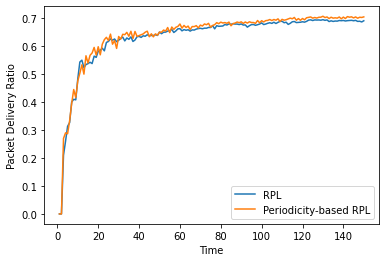

In [123]:
import matplotlib.pyplot as plt
import pickle

T = 150
pdr2 = pickle.load(open('pdf_vec-2.p', 'rb'))
pdr2 = {val[0]: val[1] for val in pdr2}

pdr1 = pickle.load(open('pdf_vec-1.p', 'rb'))
pdr1 = {val[0]: val[1] for val in pdr1}

plt.plot([t for t in sorted(pdr1.keys())], [pdr1[t] for t in sorted(pdr1.keys())], label = 'RPL')
plt.plot([t for t in sorted(pdr2.keys())], [pdr2[t] for t in sorted(pdr2.keys())], label = 'Periodicity-based RPL')

plt.ylabel("Packet Delivery Ratio")
plt.xlabel("Time")

plt.legend()
plt.show()

In [137]:
df_fig = pd.DataFrame.from_dict(pdr1.items())
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "RPL",
        showlegend=True
    )
)

df_fig = pd.DataFrame.from_dict(pdr2.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "Periodicity-based RPL",
        showlegend = True
    )
)

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Packet Delivery Ratio",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 20,
    legend = dict(
        xanchor = "right",
        x = 0.99,
        yanchor = "bottom",
        y = 0.01)
)

fig.show()

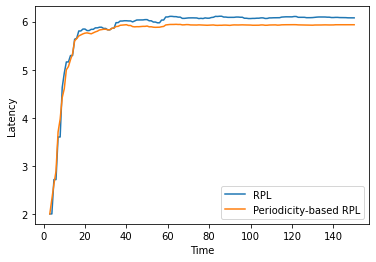

In [145]:
lat2 = pickle.load(open('lat_vec-2.p', 'rb'))
lat2 = {val[0]: val[1] for val in lat2}

lat1 = pickle.load(open('lat_vec-1.p', 'rb'))
lat1 = {val[0]: val[1] for val in lat1}

plt.plot([t for t in sorted(lat1.keys())], [lat1[t] for t in sorted(lat1.keys())], label = 'RPL')
plt.plot([t for t in sorted(lat2.keys())], [lat2[t] for t in sorted(lat2.keys())], label = 'Periodicity-based RPL')

plt.ylabel("Latency")
plt.xlabel("Time")

plt.legend()
plt.show()

In [141]:
df_fig = pd.DataFrame.from_dict(lat1.items())
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "RPL",
        showlegend=True
    )
)

df_fig = pd.DataFrame.from_dict(lat2.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "Periodicity-based RPL",
        showlegend = True
    )
)

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Latency",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 20,
    legend = dict(
        xanchor = "right",
        x = 0.99,
        yanchor = "bottom",
        y = 0.01)
)

fig.show()

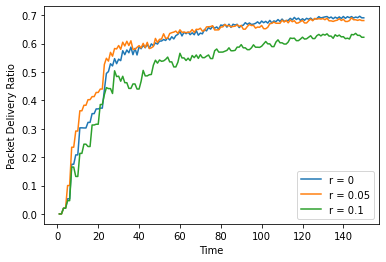

In [143]:
pdr3 = pickle.load(open('pdf_vec-10.p', 'rb'))
pdr3 = {val[0]: val[1] for val in pdr3}

pdr2 = pickle.load(open('pdf_vec-05.p', 'rb'))
pdr2 = {val[0]: val[1] for val in pdr2}

pdr1 = pickle.load(open('pdf_vec-00.p', 'rb'))
pdr1 = {val[0]: val[1] for val in pdr1}

plt.plot([t for t in sorted(pdr1.keys())], [pdr1[t] for t in sorted(pdr1.keys())], label = 'r = 0')
plt.plot([t for t in sorted(pdr2.keys())], [pdr2[t] for t in sorted(pdr2.keys())], label = 'r = 0.05')
plt.plot([t for t in sorted(pdr3.keys())], [pdr3[t] for t in sorted(pdr3.keys())], label = 'r = 0.1')

plt.ylabel("Packet Delivery Ratio")
plt.xlabel("Time")

plt.legend()
plt.show()

In [144]:
df_fig = pd.DataFrame.from_dict(pdr1.items())
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0",
        showlegend=True
    )
)

df_fig = pd.DataFrame.from_dict(pdr2.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0.05",
        showlegend = True
    )
)

df_fig = pd.DataFrame.from_dict(pdr3.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0.1",
        showlegend = True
    )
)

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Packet Delivery Ratio",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 20,
    legend = dict(
        xanchor = "right",
        x = 0.99,
        yanchor = "bottom",
        y = 0.01)
)

fig.show()

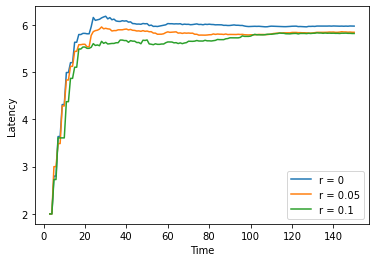

In [148]:
lat3 = pickle.load(open('lat_vec-10.p', 'rb'))
lat3 = {val[0]: val[1] for val in lat3}

lat2 = pickle.load(open('lat_vec-05.p', 'rb'))
lat2 = {val[0]: val[1] for val in lat2}

lat1 = pickle.load(open('lat_vec-00.p', 'rb'))
lat1 = {val[0]: val[1] for val in lat1}

plt.plot([t for t in sorted(lat1.keys())], [lat1[t] for t in sorted(lat1.keys())], label = 'r = 0')
plt.plot([t for t in sorted(lat2.keys())], [lat2[t] for t in sorted(lat2.keys())], label = 'r = 0.05')
plt.plot([t for t in sorted(lat3.keys())], [lat3[t] for t in sorted(lat3.keys())], label = 'r = 0.1')

plt.ylabel("Latency")
plt.xlabel("Time")

plt.legend()
plt.show()

In [149]:
df_fig = pd.DataFrame.from_dict(lat1.items())
fig = go.Figure()

# Add trace with large marker
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0",
        showlegend=True
    )
)

df_fig = pd.DataFrame.from_dict(lat2.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0.05",
        showlegend = True
    )
)

df_fig = pd.DataFrame.from_dict(lat3.items())
# Add scatter trace with medium sized markers
fig.add_trace(
    go.Scatter(
        mode='lines',
        x = df_fig[0],
        y = df_fig[1],
        name = "r = 0.1",
        showlegend = True
    )
)

fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Latency",
    margin=dict(l=20, r=20, b=20, t=20),
    font_size = 20,
    legend = dict(
        xanchor = "right",
        x = 0.99,
        yanchor = "bottom",
        y = 0.01)
)

fig.show()